<h1> Optimisez la gestion des données d'une boutique </h1>

### Sommaire

* [Les Donnees](#chapter1)
    * [Exploration](sSection_1_2)
        * [ERP](#section_1_2_1)
        * [WEB](#section_1_2_2)
        * [Liaison](#section_1_2_3)
    * [Nettoyage](#section_1_1)
    * [Rapprochement](#section_1_1)
* [Chiffres D'Affaires](#chapter2)
* [Analyse Valeurs abherrentes](#chapter3) 

In [1]:
import pandas as pd
import numpy as np
import warnings as warnings
import matplotlib.pyplot as plt
import matplotlib.cbook as cbk
import scipy.stats as stats

In [2]:
erp = pd.read_excel("~\Documents\OpenClassrooms\Projet 5\donnees\erp.xlsx")
web = pd.read_excel("~\Documents\OpenClassrooms\Projet 5\donnees\web.xlsx")
liaison = pd.read_excel("~\Documents\OpenClassrooms\Projet 5\donnees\liaison.xlsx")
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 500)

C:\Users\JuppC\anaconda3\lib\site-packages\openpyxl\worksheet\_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


Exploration et nettoyages des données

<h2> Exploration </h2> <a class="anchor" id="chapter1"></a>

<h3> Donnée ERP </h3> <a class="anchor" id="section_1_1"></a>

In [3]:
erp

,product_id,onsale_web,price,stock_quantity,stock_status
0,3847,1,24.2,0,outofstock
1,3849,1,34.3,0,outofstock
2,3850,1,20.8,0,outofstock
3,4032,1,14.1,0,outofstock
4,4039,1,46.0,0,outofstock
...,...,...,...,...,...
820,7203,0,45.0,30,instock
821,7204,0,45.0,9,instock
822,7247,1,54.8,23,instock
823,7329,0,26.5,14,instock


In [4]:
erp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_id      825 non-null    int64  
 1   onsale_web      825 non-null    int64  
 2   price           825 non-null    float64
 3   stock_quantity  825 non-null    int64  
 4   stock_status    825 non-null    object 
dtypes: float64(1), int64(3), object(1)
memory usage: 32.4+ KB


In [5]:
print(erp.describe())
print(erp.isna().sum())

        product_id  onsale_web       price  stock_quantity
count   825.000000  825.000000  825.000000      825.000000
mean   5162.597576    0.869091   32.415636       26.496970
std     902.644635    0.337506   26.795849       45.892422
min    3847.000000    0.000000    5.200000        0.000000
25%    4348.000000    1.000000   14.600000        1.000000
50%    4907.000000    1.000000   24.400000       11.000000
75%    5805.000000    1.000000   42.000000       34.000000
max    7338.000000    1.000000  225.000000      578.000000
product_id        0
onsale_web        0
price             0
stock_quantity    0
stock_status      0
dtype: int64


In [6]:
for c in erp.columns:
    print ('\nTaux de valeur unique pour %s'% c)
    print (len(erp[c].unique()))


Taux de valeur unique pour product_id
825

Taux de valeur unique pour onsale_web
2

Taux de valeur unique pour price
381

Taux de valeur unique pour stock_quantity
128

Taux de valeur unique pour stock_status
2


In [7]:
categorical_columns = ['product_id', 'onsale_web', 'price', 'stock_quantity', 'stock_status']
#Print frequency of categories
for col in categorical_columns:
    print ('\nTaux de valeur unique pour %s'%col)
    print (len(erp[col].unique()))


Taux de valeur unique pour product_id
825

Taux de valeur unique pour onsale_web
2

Taux de valeur unique pour price
381

Taux de valeur unique pour stock_quantity
128

Taux de valeur unique pour stock_status
2


In [8]:
print("On a un total de {} id de produit unique d'une longueur de {} chiffres ".format(len(erp.product_id.unique()), erp['product_id'].map(str).apply(len).unique()))

On a un total de 825 id de produit unique d'une longueur de [4] chiffres 


<h5> 1ere Vérifications d'erreur dans les données </h5>

In [9]:
# une erreur concernant le statut du stock
erp[(erp["stock_quantity"] <= 0)&(erp["stock_status"] == "instock")]

,product_id,onsale_web,price,stock_quantity,stock_status
443,4954,1,25.0,0,instock


In [10]:
# une erreur concernant le statut du stock
erp[(erp["stock_quantity"] > 0)&(erp["stock_status"] == "outofstock")]

,product_id,onsale_web,price,stock_quantity,stock_status


<h4>  Conclusion: De premiere analyse, on a aucune valeur NaN dans notre tableau ERP. On a 825 lignes total dans notre tableau qui corresponds à 825 id de produit uniques de taille similaire avec une erreur presente selon le status du stock. </h4> 

<h3> WEB </h3>

In [11]:
web.head()

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,post_date_gmt,post_content,post_title,post_excerpt,post_status,comment_status,ping_status,post_password,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,bon-cadeau-25-euros,0,0,0,0.0,10.0,taxable,NaN,1.0,2018-06-01 13:53:46,2018-06-01 11:53:46,NaN,Bon cadeau de 25€,"<span style=""color: #a85253;""><strong>Parlons ...",publish,closed,closed,NaN,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1,15298,0,0,0,0.0,6.0,taxable,NaN,2.0,2018-02-08 12:58:52,2018-02-08 11:58:52,NaN,Pierre Jean Villa Saint-Joseph Préface 2018,"Il exhale un nez subtil, racé avec du poivre f...",publish,closed,closed,NaN,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
2,15296,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 13:49:41,2018-02-08 12:49:41,NaN,Pierre Jean Villa Saint-Joseph Rouge Tildé 2017,Les vieilles vignes lui apportent une rare pro...,publish,closed,closed,NaN,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
3,15300,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 14:08:36,2018-02-08 13:08:36,NaN,Pierre Jean Villa Crozes-Hermitage Accroche Co...,"Dentelle de fruit de jeunes syrah, aux tanins ...",publish,closed,closed,NaN,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
4,19814,0,0,0,0.0,3.0,taxable,NaN,2.0,2018-02-09 14:01:05,2018-02-09 13:01:05,NaN,Pierre Jean Villa IGP Collines Rhodaniennes Ga...,Gamine représente tout le fruité et la gourman...,publish,closed,closed,NaN,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


In [12]:
web.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1513 entries, 0 to 1512
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   sku                    1428 non-null   object        
 1   virtual                1513 non-null   int64         
 2   downloadable           1513 non-null   int64         
 3   rating_count           1513 non-null   int64         
 4   average_rating         1430 non-null   float64       
 5   total_sales            1430 non-null   float64       
 6   tax_status             716 non-null    object        
 7   tax_class              0 non-null      float64       
 8   post_author            1430 non-null   float64       
 9   post_date              1430 non-null   datetime64[ns]
 10  post_date_gmt          1430 non-null   datetime64[ns]
 11  post_content           0 non-null      float64       
 12  post_title             1430 non-null   object        
 13  pos

In [13]:
web.describe(include='all')

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,post_date_gmt,post_content,post_title,post_excerpt,post_status,comment_status,ping_status,post_password,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
count,1428,1513.0,1513.0,1513.0,1430.0,1430.000000,716,0.0,1430.000000,1430,1430,0.0,1430,716,1430,1430,1430,0.0,1430,1430,1430,0.0,1430.0,1430,1430.0,1430,714,1430.0
unique,714,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,716,716,NaN,713,679,1,1,1,NaN,716,589,589,NaN,NaN,1430,NaN,2,1,NaN
top,bon-cadeau-25-euros,NaN,NaN,NaN,NaN,NaN,taxable,NaN,NaN,2018-06-01 13:53:46,2018-06-01 11:53:46,NaN,Clos du Mont-Olivet Châteauneuf-du-Pape 2007,Les eaux de vie naissent d'une subtile alchimi...,publish,closed,closed,NaN,bon-cadeau-de-25-euros,2020-08-26 15:55:03,2020-08-26 13:55:03,NaN,NaN,https://www.bottle-neck.fr/?post_type=product&...,NaN,product,image/jpeg,NaN
freq,2,NaN,NaN,NaN,NaN,NaN,716,NaN,NaN,2,2,NaN,4,12,1430,1430,1430,NaN,2,14,14,NaN,NaN,1,NaN,716,714,NaN
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-02-08 12:58:52,2018-02-08 11:58:52,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-02-20 15:19:23,2018-02-20 14:19:23,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-07-20 11:00:00,2020-07-20 09:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-08-27 18:55:03,2020-08-27 16:55:03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,0.0,0.0,0.0,0.0,4.006993,NaN,NaN,1.998601,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,0.0
std,NaN,0.0,0.0,0.0,0.0,8.510559,NaN,NaN,0.037385,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,0.0
min,NaN,0.0,0.0,0.0,0.0,0.000000,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,0.0
25%,NaN,0.0,0.0,0.0,0.0,0.000000,NaN,NaN,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,0.0


In [14]:
web.isna().sum()

sku                        85
virtual                     0
downloadable                0
rating_count                0
average_rating             83
total_sales                83
tax_status                797
tax_class                1513
post_author                83
post_date                  83
post_date_gmt              83
post_content             1513
post_title                 83
post_excerpt              797
post_status                83
comment_status             83
ping_status                83
post_password            1513
post_name                  83
post_modified              83
post_modified_gmt          83
post_content_filtered    1513
post_parent                83
guid                       83
menu_order                 83
post_type                  83
post_mime_type            799
comment_count              83
dtype: int64

In [15]:
print("Valeurs unique du SKU {}".format(len(web['sku'].unique())))

Valeurs unique du SKU 715


In [16]:
web['post_type'].unique()

array(['product', nan, 'attachment'], dtype=object)

In [17]:
# If statement en place temporaire, a corriger
for c in web.columns:
    if len(web[c].unique()) >1:
        print ('\nTaux de valeur unique pour %s'% c)
        print (len(web[c].unique()))


Taux de valeur unique pour sku
715

Taux de valeur unique pour average_rating
2

Taux de valeur unique pour total_sales
42

Taux de valeur unique pour tax_status
2

Taux de valeur unique pour post_author
3

Taux de valeur unique pour post_date
717

Taux de valeur unique pour post_date_gmt
717

Taux de valeur unique pour post_title
714

Taux de valeur unique pour post_excerpt
680

Taux de valeur unique pour post_status
2

Taux de valeur unique pour comment_status
2

Taux de valeur unique pour ping_status
2

Taux de valeur unique pour post_name
717

Taux de valeur unique pour post_modified
590

Taux de valeur unique pour post_modified_gmt
590

Taux de valeur unique pour post_parent
2

Taux de valeur unique pour guid
1431

Taux de valeur unique pour menu_order
2

Taux de valeur unique pour post_type
3

Taux de valeur unique pour post_mime_type
2

Taux de valeur unique pour comment_count
2


In [18]:
#Je decide de supprimer des colonnes qui ne sont pas essentiels car les informations apportees sont tres peu interessant car ce sont des valeurs nulle ou que des NaN
web = web.drop(columns=['virtual','downloadable','rating_count','post_content_filtered', 'post_password','post_content','tax_class' ])

In [19]:
for c in web.columns:
    if len(web[c].unique()) >2 and len(web[c].unique()) <500:
        print ('\nTaux de valeur unique pour %s'% c)
        print (len(web[c].unique()), web[c].unique())


Taux de valeur unique pour total_sales
42 [10.  6.  0.  3.  7. 14.  1. 23. 18. 11.  9. 20. 19. 62.  4. 12.  5.  2.
 40. 30. 87. 36. 43. 13. 17. 42.  8. 46. 16. 15. nan 96. 32. 38. 29. 33.
 22. 24. 26. 21. 41. 37.]

Taux de valeur unique pour post_author
3 [ 1.  2. nan]

Taux de valeur unique pour post_type
3 ['product' nan 'attachment']


In [20]:
b1 = len(web['sku'].unique())
b2 = web['sku'].map(str).apply(len).unique()
print('On a un total de:' , b1, 'valeur unique de longueur variante de', b2, 'caractere dont des NaN')

On a un total de: 715 valeur unique de longueur variante de [19  5  3  4  2  7] caractere dont des NaN


Contrairement au tableau de ERP precedent, notre tableau WEB contient beaucoup plus de valeurs NaN et par observations, on peut constater une doublure des valeurs SKU a causer de la variable "post_type" qui double les informations avec les criteres "product" et "attachment" et des valeurs "NaN" donc il n'est pas pertinent de garder ces doublons.

In [21]:
web[web['post_type']=='product']

,sku,average_rating,total_sales,tax_status,post_author,post_date,post_date_gmt,post_title,post_excerpt,post_status,comment_status,ping_status,post_name,post_modified,post_modified_gmt,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,bon-cadeau-25-euros,0.0,10.0,taxable,1.0,2018-06-01 13:53:46,2018-06-01 11:53:46,Bon cadeau de 25€,"<span style=""color: #a85253;""><strong>Parlons ...",publish,closed,closed,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1,15298,0.0,6.0,taxable,2.0,2018-02-08 12:58:52,2018-02-08 11:58:52,Pierre Jean Villa Saint-Joseph Préface 2018,"Il exhale un nez subtil, racé avec du poivre f...",publish,closed,closed,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
2,15296,0.0,0.0,taxable,2.0,2018-02-08 13:49:41,2018-02-08 12:49:41,Pierre Jean Villa Saint-Joseph Rouge Tildé 2017,Les vieilles vignes lui apportent une rare pro...,publish,closed,closed,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
3,15300,0.0,0.0,taxable,2.0,2018-02-08 14:08:36,2018-02-08 13:08:36,Pierre Jean Villa Crozes-Hermitage Accroche Co...,"Dentelle de fruit de jeunes syrah, aux tanins ...",publish,closed,closed,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
4,19814,0.0,3.0,taxable,2.0,2018-02-09 14:01:05,2018-02-09 13:01:05,Pierre Jean Villa IGP Collines Rhodaniennes Ga...,Gamine représente tout le fruité et la gourman...,publish,closed,closed,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
762,16135,0.0,5.0,taxable,2.0,2020-04-25 13:22:38,2020-04-25 11:22:38,Mouthes Le Bihan Côtes de Duras L'Aimé Chai 2015,Belle robe jeune à dominante rubis soutenue. N...,publish,closed,closed,mouthes-le-bihan-aime-chai-2015,2020-08-26 17:35:03,2020-08-26 15:35:03,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
767,15891,0.0,0.0,taxable,2.0,2020-05-02 14:53:40,2020-05-02 12:53:40,Camin Larredya Jurançon Sec La Virada 2018,L'exotisme du nez est complété par d'élégantes...,publish,closed,closed,camin-larredya-jurancon-sec-la-virada-2018,2020-08-26 17:35:02,2020-08-26 15:35:02,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
768,15887,0.0,0.0,taxable,2.0,2020-05-02 15:00:54,2020-05-02 13:00:54,Domaine Jamet Côte Rôtie Fructus Voluptas 2018,"Pour cette cuvée, Jean-Paul Jamet recherche un...",publish,closed,closed,jamet-cote-rotie-fructus-voluptas-2018,2020-08-14 18:15:03,2020-08-14 16:15:03,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
797,13127-1,0.0,0.0,taxable,2.0,2020-06-09 15:42:04,2020-06-09 13:42:04,Clos du Mont-Olivet Châteauneuf-du-Pape 2007,"Nez gracieux, très élégant avec une touche flo...",publish,closed,closed,clos-du-mont-olivet-chateauneuf-du-pape-2007-2,2020-07-20 17:09:06,2020-07-20 15:09:06,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


In [22]:
Q = web[web["sku"].isnull()]
Q.describe(include='all')

,sku,average_rating,total_sales,tax_status,post_author,post_date,post_date_gmt,post_title,post_excerpt,post_status,comment_status,ping_status,post_name,post_modified,post_modified_gmt,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
count,0,2.0,2.0,2,2.0,2,2,2,2,2,2,2,2,2,2,2.0,2,2.0,2,0,2.0
unique,0,NaN,NaN,1,NaN,2,2,2,2,1,1,1,2,2,2,NaN,2,NaN,1,0,NaN
top,NaN,NaN,NaN,taxable,NaN,2018-07-31 12:07:23,2018-07-31 10:07:23,Pierre Jean Villa Côte Rôtie Fongeant 2017,"Fongeant 2017 explose sur un fruit brillant, p...",publish,closed,closed,pierre-jean-villa-cote-rotie-fongeant-2017,2019-11-02 13:24:15,2019-11-02 12:24:15,NaN,https://www.bottle-neck.fr/?post_type=product&...,NaN,product,NaN,NaN
freq,NaN,NaN,NaN,2,NaN,1,1,1,1,2,2,2,1,1,1,NaN,1,NaN,2,NaN,NaN
first,NaN,NaN,NaN,NaN,NaN,2018-07-31 12:07:23,2018-07-31 10:07:23,NaN,NaN,NaN,NaN,NaN,NaN,2019-11-02 13:24:01,2019-11-02 12:24:01,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,2018-08-08 11:23:43,2018-08-08 09:23:43,NaN,NaN,NaN,NaN,NaN,NaN,2019-11-02 13:24:15,2019-11-02 12:24:15,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,0.0,0.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,0.0
std,NaN,0.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,0.0
min,NaN,0.0,0.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,0.0
25%,NaN,0.0,0.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,0.0


In [23]:
P = Q[Q["guid"].notna()]
P

,sku,average_rating,total_sales,tax_status,post_author,post_date,post_date_gmt,post_title,post_excerpt,post_status,comment_status,ping_status,post_name,post_modified,post_modified_gmt,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
470,NaN,0.0,0.0,taxable,2.0,2018-07-31 12:07:23,2018-07-31 10:07:23,Pierre Jean Villa Côte Rôtie Fongeant 2017,"Fongeant 2017 explose sur un fruit brillant, p...",publish,closed,closed,pierre-jean-villa-cote-rotie-fongeant-2017,2019-11-02 13:24:15,2019-11-02 12:24:15,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
471,NaN,0.0,0.0,taxable,2.0,2018-08-08 11:23:43,2018-08-08 09:23:43,Pierre Jean Villa Condrieu Jardin Suspendu 2018,"<span id=""u1194-83"">Le nez séduit par ses parf...",publish,closed,closed,pierre-jean-villa-condrieu-suspendu-2018,2019-11-02 13:24:01,2019-11-02 12:24:01,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


On obtient ainsi une base de donnees WEB avec des valeurs unique sans doublons ni valeurs NaN mais qui pourrait necessiter plus de nettoyage en fonction des valeurs dans le tableau liaison.

<h3> LIAISON </h3>

In [24]:
liaison

,product_id,id_web
0,3847,15298
1,3849,15296
2,3850,15300
3,4032,19814
4,4039,19815
...,...,...
820,7203,NaN
821,7204,NaN
822,7247,13127-1
823,7329,14680-1


In [25]:
liaison.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   product_id  825 non-null    int64 
 1   id_web      734 non-null    object
dtypes: int64(1), object(1)
memory usage: 13.0+ KB


In [26]:
liaison.describe(include = "all")

,product_id,id_web
count,825.000000,734.0
unique,NaN,734.0
top,NaN,15298.0
freq,NaN,1.0
mean,5162.597576,NaN
std,902.644635,NaN
min,3847.000000,NaN
25%,4348.000000,NaN
50%,4907.000000,NaN
75%,5805.000000,NaN


Meme total de product_id que la table erp mais sku different
Le nombre de product_id rensseignr est superieure au sku present dont presence de NaN.

In [27]:
liaison.isna().sum()

product_id     0
id_web        91
dtype: int64

In [28]:
c1 = len(liaison['product_id'].unique())
c2 = liaison['product_id'].map(str).apply(len).unique()
c3 = len(liaison['id_web'].unique())
c4 = liaison['id_web'].map(str).apply(len).unique()
print('On a un total de:' , c1, 'valeur unique d`une longueur de', c2, 'chiffre et un total de', c3, 'caracteres variante de',c4,'pour nos produits web')

On a un total de: 825 valeur unique d`une longueur de [4] chiffre et un total de 735 caracteres variante de [ 5  3  4  2 19  7] pour nos produits web


In [29]:
liaison['id_web'].map(str).apply(len).value_counts()

5     690
3     102
4      28
2       2
7       2
19      1
Name: id_web, dtype: int64

In [30]:
liaison[liaison['id_web'].map(str).apply(len) !=5] 

,product_id,id_web
19,4055,NaN
49,4090,NaN
50,4092,NaN
72,4141,304
74,4144,1662
75,4146,1360
77,4148,1364
78,4149,7086
79,4150,1366
119,4195,NaN


In [31]:
liaisonManque = liaison[liaison['id_web'].isna()]
liaisonManque

,product_id,id_web
19,4055,NaN
49,4090,NaN
50,4092,NaN
119,4195,NaN
131,4209,NaN
151,4233,NaN
184,4278,NaN
185,4279,NaN
234,4565,NaN
238,4577,NaN


In [32]:
liaison.rename(columns={'id_web': 'sku'}, inplace=True)

<h2> Nettoyage </h2>

In [33]:
webProduct = web.loc[web['post_type']=='product']
webAttachment = web.loc[web['post_type']=='attachment']
#"guid" contient id produit avec un sku NaN mais present dans liaison et erp

In [34]:
webProduct.head(15)

,sku,average_rating,total_sales,tax_status,post_author,post_date,post_date_gmt,post_title,post_excerpt,post_status,comment_status,ping_status,post_name,post_modified,post_modified_gmt,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,bon-cadeau-25-euros,0.0,10.0,taxable,1.0,2018-06-01 13:53:46,2018-06-01 11:53:46,Bon cadeau de 25€,"<span style=""color: #a85253;""><strong>Parlons ...",publish,closed,closed,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1,15298,0.0,6.0,taxable,2.0,2018-02-08 12:58:52,2018-02-08 11:58:52,Pierre Jean Villa Saint-Joseph Préface 2018,"Il exhale un nez subtil, racé avec du poivre f...",publish,closed,closed,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
2,15296,0.0,0.0,taxable,2.0,2018-02-08 13:49:41,2018-02-08 12:49:41,Pierre Jean Villa Saint-Joseph Rouge Tildé 2017,Les vieilles vignes lui apportent une rare pro...,publish,closed,closed,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
3,15300,0.0,0.0,taxable,2.0,2018-02-08 14:08:36,2018-02-08 13:08:36,Pierre Jean Villa Crozes-Hermitage Accroche Co...,"Dentelle de fruit de jeunes syrah, aux tanins ...",publish,closed,closed,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
4,19814,0.0,3.0,taxable,2.0,2018-02-09 14:01:05,2018-02-09 13:01:05,Pierre Jean Villa IGP Collines Rhodaniennes Ga...,Gamine représente tout le fruité et la gourman...,publish,closed,closed,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
5,19815,0.0,0.0,taxable,2.0,2018-02-12 09:04:37,2018-02-12 08:04:37,Pierre Jean Villa Côte Rôtie Carmina 2017,Le côte rôtie Carmina monte en puissance mais ...,publish,closed,closed,pierre-jean-villa-cote-rotie-carmina-2017,2020-01-04 16:36:10,2020-01-04 15:36:10,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
6,15303,0.0,0.0,taxable,2.0,2018-02-12 09:13:35,2018-02-12 08:13:35,Pierre Jean Villa Saint-Joseph Saut De l'Ange ...,"Roussanne finement exotique, atypique par sa v...",publish,closed,closed,pierre-jean-villa-saint-joseph-saut-ange-2018,2019-11-02 13:25:07,2019-11-02 12:25:07,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
7,14975,0.0,0.0,taxable,2.0,2018-02-12 09:45:14,2018-02-12 08:45:14,Pierre Gaillard Condrieu 2018,Un joli nez de fruits exotiques comme le litch...,publish,closed,closed,pierre-gaillard-condrieu-2018,2020-08-14 18:15:02,2020-08-14 16:15:02,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
8,16042,0.0,7.0,taxable,2.0,2018-02-12 09:54:27,2018-02-12 08:54:27,Pierre Gaillard Cornas 2017,Une jolie robe grenat avec des reflets violacé...,publish,closed,closed,pierre-gaillard-cornas-2017,2020-08-14 10:15:02,2020-08-14 08:15:02,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
9,14980,0.0,3.0,taxable,2.0,2018-02-12 10:03:05,2018-02-12 09:03:05,Pierre Gaillard Côte Rôtie Esprit de Blonde 2017,"Complexité, finesse et subtilité sont au rende...",publish,closed,closed,pierre-gaillard-cote-rotie-esprit-blond-2017,2020-08-24 14:00:03,2020-08-24 12:00:03,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


In [35]:
webAttachment.head(15)

,sku,average_rating,total_sales,tax_status,post_author,post_date,post_date_gmt,post_title,post_excerpt,post_status,comment_status,ping_status,post_name,post_modified,post_modified_gmt,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
799,15298,0.0,6.0,NaN,2.0,2018-02-08 12:58:52,2018-02-08 11:58:52,Pierre Jean Villa Saint-Joseph Préface 2018,NaN,publish,closed,closed,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
800,15296,0.0,0.0,NaN,2.0,2018-02-08 13:49:41,2018-02-08 12:49:41,Pierre Jean Villa Saint-Joseph Rouge Tildé 2017,NaN,publish,closed,closed,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
801,15300,0.0,0.0,NaN,2.0,2018-02-08 14:08:36,2018-02-08 13:08:36,Pierre Jean Villa Crozes-Hermitage Accroche Co...,NaN,publish,closed,closed,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
802,19814,0.0,3.0,NaN,2.0,2018-02-09 14:01:05,2018-02-09 13:01:05,Pierre Jean Villa IGP Collines Rhodaniennes Ga...,NaN,publish,closed,closed,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
803,19815,0.0,0.0,NaN,2.0,2018-02-12 09:04:37,2018-02-12 08:04:37,Pierre Jean Villa Côte Rôtie Carmina 2017,NaN,publish,closed,closed,pierre-jean-villa-cote-rotie-carmina-2017,2020-01-04 16:36:10,2020-01-04 15:36:10,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
804,15303,0.0,0.0,NaN,2.0,2018-02-12 09:13:35,2018-02-12 08:13:35,Pierre Jean Villa Saint-Joseph Saut De l'Ange ...,NaN,publish,closed,closed,pierre-jean-villa-saint-joseph-saut-ange-2018,2019-11-02 13:25:07,2019-11-02 12:25:07,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
805,14975,0.0,0.0,NaN,2.0,2018-02-12 09:45:14,2018-02-12 08:45:14,Pierre Gaillard Condrieu 2018,NaN,publish,closed,closed,pierre-gaillard-condrieu-2018,2020-08-14 18:15:02,2020-08-14 16:15:02,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
806,16042,0.0,7.0,NaN,2.0,2018-02-12 09:54:27,2018-02-12 08:54:27,Pierre Gaillard Cornas 2017,NaN,publish,closed,closed,pierre-gaillard-cornas-2017,2020-08-14 10:15:02,2020-08-14 08:15:02,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
807,14980,0.0,3.0,NaN,2.0,2018-02-12 10:03:05,2018-02-12 09:03:05,Pierre Gaillard Côte Rôtie Esprit de Blonde 2017,NaN,publish,closed,closed,pierre-gaillard-cote-rotie-esprit-blond-2017,2020-08-24 14:00:03,2020-08-24 12:00:03,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
808,16041,0.0,14.0,NaN,2.0,2018-02-12 10:09:03,2018-02-12 09:09:03,Pierre Gaillard Côte Rôtie 2018,NaN,publish,closed,closed,pierre-gaillard-cote-rotie-2018,2020-08-03 09:55:03,2020-08-03 07:55:03,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0


In [36]:
webProduct.count()

sku                  714
average_rating       716
total_sales          716
tax_status           716
post_author          716
post_date            716
post_date_gmt        716
post_title           716
post_excerpt         716
post_status          716
comment_status       716
ping_status          716
post_name            716
post_modified        716
post_modified_gmt    716
post_parent          716
guid                 716
menu_order           716
post_type            716
post_mime_type         0
comment_count        716
dtype: int64

In [37]:
webAttachment.count()

sku                  714
average_rating       714
total_sales          714
tax_status             0
post_author          714
post_date            714
post_date_gmt        714
post_title           714
post_excerpt           0
post_status          714
comment_status       714
ping_status          714
post_name            714
post_modified        714
post_modified_gmt    714
post_parent          714
guid                 714
menu_order           714
post_type            714
post_mime_type       714
comment_count        714
dtype: int64

In [38]:
webProduct[webProduct['sku'].isnull()]

,sku,average_rating,total_sales,tax_status,post_author,post_date,post_date_gmt,post_title,post_excerpt,post_status,comment_status,ping_status,post_name,post_modified,post_modified_gmt,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
470,NaN,0.0,0.0,taxable,2.0,2018-07-31 12:07:23,2018-07-31 10:07:23,Pierre Jean Villa Côte Rôtie Fongeant 2017,"Fongeant 2017 explose sur un fruit brillant, p...",publish,closed,closed,pierre-jean-villa-cote-rotie-fongeant-2017,2019-11-02 13:24:15,2019-11-02 12:24:15,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
471,NaN,0.0,0.0,taxable,2.0,2018-08-08 11:23:43,2018-08-08 09:23:43,Pierre Jean Villa Condrieu Jardin Suspendu 2018,"<span id=""u1194-83"">Le nez séduit par ses parf...",publish,closed,closed,pierre-jean-villa-condrieu-suspendu-2018,2019-11-02 13:24:01,2019-11-02 12:24:01,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


In [39]:
webProduct.loc[webProduct.guid.isna(),:]

,sku,average_rating,total_sales,tax_status,post_author,post_date,post_date_gmt,post_title,post_excerpt,post_status,comment_status,ping_status,post_name,post_modified,post_modified_gmt,post_parent,guid,menu_order,post_type,post_mime_type,comment_count


In [40]:
webProduct[webProduct['sku'].isnull()]['guid'].values


array(['https://www.bottle-neck.fr/?post_type=product&#038;p=5070',
       'https://www.bottle-neck.fr/?post_type=product&#038;p=5075'],
      dtype=object)

In [41]:
webProduct.at[470,'sku']= 15347
webProduct.at[471, 'sku']= 15348

In [42]:
print(liaison.loc[liaison['product_id']==5070])
print(liaison.loc[liaison['product_id']==5075])

     product_id  sku
486        5070  NaN
     product_id  sku
487        5075  NaN


In [43]:
liaison.at[486,'sku']= 15347
liaison.at[487, 'sku']= 15348
print(liaison.loc[liaison['product_id']==5070])
print(liaison.loc[liaison['product_id']==5075])

     product_id    sku
486        5070  15347
     product_id    sku
487        5075  15348


<h2> Rapprochement </h2>

In [44]:
erp_web = liaison.merge(erp,how='outer', indicator='liaisonerp',on='product_id').merge(webProduct,how='outer', indicator='liaisonerpweb',on='sku')
erp_web.liaisonerpweb.unique()

['both', 'left_only']
Categories (3, object): ['left_only', 'right_only', 'both']

In [45]:
erp_web[erp_web.liaisonerpweb=='both'].head(15)

,product_id,sku,onsale_web,price,stock_quantity,stock_status,liaisonerp,average_rating,total_sales,tax_status,post_author,post_date,post_date_gmt,post_title,post_excerpt,post_status,comment_status,ping_status,post_name,post_modified,post_modified_gmt,post_parent,guid,menu_order,post_type,post_mime_type,comment_count,liaisonerpweb
0,3847,15298,1,24.2,0,outofstock,both,0.0,6.0,taxable,2.0,2018-02-08 12:58:52,2018-02-08 11:58:52,Pierre Jean Villa Saint-Joseph Préface 2018,"Il exhale un nez subtil, racé avec du poivre f...",publish,closed,closed,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both
1,3849,15296,1,34.3,0,outofstock,both,0.0,0.0,taxable,2.0,2018-02-08 13:49:41,2018-02-08 12:49:41,Pierre Jean Villa Saint-Joseph Rouge Tildé 2017,Les vieilles vignes lui apportent une rare pro...,publish,closed,closed,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both
2,3850,15300,1,20.8,0,outofstock,both,0.0,0.0,taxable,2.0,2018-02-08 14:08:36,2018-02-08 13:08:36,Pierre Jean Villa Crozes-Hermitage Accroche Co...,"Dentelle de fruit de jeunes syrah, aux tanins ...",publish,closed,closed,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both
3,4032,19814,1,14.1,0,outofstock,both,0.0,3.0,taxable,2.0,2018-02-09 14:01:05,2018-02-09 13:01:05,Pierre Jean Villa IGP Collines Rhodaniennes Ga...,Gamine représente tout le fruité et la gourman...,publish,closed,closed,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both
4,4039,19815,1,46.0,0,outofstock,both,0.0,0.0,taxable,2.0,2018-02-12 09:04:37,2018-02-12 08:04:37,Pierre Jean Villa Côte Rôtie Carmina 2017,Le côte rôtie Carmina monte en puissance mais ...,publish,closed,closed,pierre-jean-villa-cote-rotie-carmina-2017,2020-01-04 16:36:10,2020-01-04 15:36:10,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both
5,4040,15303,1,34.3,0,outofstock,both,0.0,0.0,taxable,2.0,2018-02-12 09:13:35,2018-02-12 08:13:35,Pierre Jean Villa Saint-Joseph Saut De l'Ange ...,"Roussanne finement exotique, atypique par sa v...",publish,closed,closed,pierre-jean-villa-saint-joseph-saut-ange-2018,2019-11-02 13:25:07,2019-11-02 12:25:07,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both
6,4041,14975,1,32.7,15,instock,both,0.0,0.0,taxable,2.0,2018-02-12 09:45:14,2018-02-12 08:45:14,Pierre Gaillard Condrieu 2018,Un joli nez de fruits exotiques comme le litch...,publish,closed,closed,pierre-gaillard-condrieu-2018,2020-08-14 18:15:02,2020-08-14 16:15:02,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both
7,4042,16042,1,31.2,34,instock,both,0.0,7.0,taxable,2.0,2018-02-12 09:54:27,2018-02-12 08:54:27,Pierre Gaillard Cornas 2017,Une jolie robe grenat avec des reflets violacé...,publish,closed,closed,pierre-gaillard-cornas-2017,2020-08-14 10:15:02,2020-08-14 08:15:02,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both
8,4043,14980,1,60.0,12,instock,both,0.0,3.0,taxable,2.0,2018-02-12 10:03:05,2018-02-12 09:03:05,Pierre Gaillard Côte Rôtie Esprit de Blonde 2017,"Complexité, finesse et subtilité sont au rende...",publish,closed,closed,pierre-gaillard-cote-rotie-esprit-blond-2017,2020-08-24 14:00:03,2020-08-24 12:00:03,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both
9,4045,16041,1,42.6,66,instock,both,0.0,14.0,taxable,2.0,2018-02-12 10:09:03,2018-02-12 09:09:03,Pierre Gaillard Côte Rôtie 2018,Ce vin exprime la diversité et l'équilibre ent...,publish,closed,closed,pierre-gaillard-cote-rotie-2018,2020-08-03 09:55:03,2020-08-03 07:55:03,0.0,https://www.bottle-neck.fr/?post_typ

In [46]:
erp_web[erp_web.liaisonerpweb=='left_only'].head(10)

,product_id,sku,onsale_web,price,stock_quantity,stock_status,liaisonerp,average_rating,total_sales,tax_status,post_author,post_date,post_date_gmt,post_title,post_excerpt,post_status,comment_status,ping_status,post_name,post_modified,post_modified_gmt,post_parent,guid,menu_order,post_type,post_mime_type,comment_count,liaisonerpweb
19,4055,NaN,0,86.1,0,outofstock,both,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,left_only
20,4090,NaN,0,73.0,0,outofstock,both,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,left_only
21,4092,NaN,0,47.0,0,outofstock,both,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,left_only
22,4195,NaN,0,14.1,0,outofstock,both,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,left_only
23,4209,NaN,0,73.5,0,outofstock,both,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,left_only
24,4233,NaN,0,20.0,0,outofstock,both,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,left_only
25,4278,NaN,0,21.5,0,outofstock,both,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,left_only
26,4279,NaN,0,10.8,0,outofstock,both,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,left_only
27,4565,NaN,0,30.5,3,instock,both,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,left_only
28,4577,NaN,0,49.0,1,instock,both,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,left_only


In [47]:
erp_web[erp_web.liaisonerpweb=='right_only'].head()

,product_id,sku,onsale_web,price,stock_quantity,stock_status,liaisonerp,average_rating,total_sales,tax_status,post_author,post_date,post_date_gmt,post_title,post_excerpt,post_status,comment_status,ping_status,post_name,post_modified,post_modified_gmt,post_parent,guid,menu_order,post_type,post_mime_type,comment_count,liaisonerpweb


In [48]:
erp_web.describe()

,product_id,onsale_web,price,stock_quantity,average_rating,total_sales,post_author,post_parent,menu_order,comment_count
count,825.000000,825.000000,825.000000,825.000000,716.0,716.000000,716.000000,716.0,716.0,716.0
mean,5162.597576,0.869091,32.415636,26.496970,0.0,4.001397,1.998603,0.0,0.0,0.0
std,902.644635,0.337506,26.795849,45.892422,0.0,8.508901,0.037372,0.0,0.0,0.0
min,3847.000000,0.000000,5.200000,0.000000,0.0,0.000000,1.000000,0.0,0.0,0.0
25%,4348.000000,1.000000,14.600000,1.000000,0.0,0.000000,2.000000,0.0,0.0,0.0
50%,4907.000000,1.000000,24.400000,11.000000,0.0,1.000000,2.000000,0.0,0.0,0.0
75%,5805.000000,1.000000,42.000000,34.000000,0.0,4.000000,2.000000,0.0,0.0,0.0
max,7338.000000,1.000000,225.000000,578.000000,0.0,96.000000,2.000000,0.0,0.0,0.0


In [49]:
erp_web.isnull().sum()

product_id             0
sku                   89
onsale_web             0
price                  0
stock_quantity         0
stock_status           0
liaisonerp             0
average_rating       109
total_sales          109
tax_status           109
post_author          109
post_date            109
post_date_gmt        109
post_title           109
post_excerpt         109
post_status          109
comment_status       109
ping_status          109
post_name            109
post_modified        109
post_modified_gmt    109
post_parent          109
guid                 109
menu_order           109
post_type            109
post_mime_type       825
comment_count        109
liaisonerpweb          0
dtype: int64

<h2> Analyses des Prix </h2>

<h2> Vente </h2>

In [50]:
Vente = erp_web[erp_web.liaisonerpweb=='both']
Vente = Vente[['product_id','sku','post_title','price','total_sales', 'post_excerpt','stock_quantity']]
Vente["chiffres_affaires"] = Vente['price']*Vente['total_sales']
Vente["pourcentage_CA"] = ((Vente['chiffres_affaires']/Vente["chiffres_affaires"].sum())*100).round(2)
Vente

,product_id,sku,post_title,price,total_sales,post_excerpt,stock_quantity,chiffres_affaires,pourcentage_CA
0,3847,15298,Pierre Jean Villa Saint-Joseph Préface 2018,24.2,6.0,"Il exhale un nez subtil, racé avec du poivre f...",0,145.2,0.21
1,3849,15296,Pierre Jean Villa Saint-Joseph Rouge Tildé 2017,34.3,0.0,Les vieilles vignes lui apportent une rare pro...,0,0.0,0.00
2,3850,15300,Pierre Jean Villa Crozes-Hermitage Accroche Co...,20.8,0.0,"Dentelle de fruit de jeunes syrah, aux tanins ...",0,0.0,0.00
3,4032,19814,Pierre Jean Villa IGP Collines Rhodaniennes Ga...,14.1,3.0,Gamine représente tout le fruité et la gourman...,0,42.3,0.06
4,4039,19815,Pierre Jean Villa Côte Rôtie Carmina 2017,46.0,0.0,Le côte rôtie Carmina monte en puissance mais ...,0,0.0,0.00
...,...,...,...,...,...,...,...,...,...
819,6930,16135,Mouthes Le Bihan Côtes de Duras L'Aimé Chai 2015,8.4,5.0,Belle robe jeune à dominante rubis soutenue. N...,83,42.0,0.06
820,7023,15891,Camin Larredya Jurançon Sec La Virada 2018,27.5,0.0,L'exotisme du nez est complété par d'élégantes...,15,0.0,0.00
821,7025,15887,Domaine Jamet Côte Rôtie Fructus Voluptas 2018,69.0,0.0,"Pour cette cuvée, Jean-Paul Jamet recherche un...",2,0.0,0.00
822,7247,13127-1,Clos du Mont-Olivet Châteauneuf-du-Pape 2007,54.8,0.0,"Nez gracieux, très élégant avec une touche flo...",23,0.0,0.00


In [51]:
#Top produits par chiffres d'affaires
Vente.sort_values(by="chiffres_affaires", ascending=False).head()

,product_id,sku,post_title,price,total_sales,post_excerpt,stock_quantity,chiffres_affaires,pourcentage_CA
284,4334,7818,Champagne Gosset Grand Blanc de Blancs,49.0,96.0,La bulle fine et presente se dirige vers la su...,0,4704.0,6.67
160,4144,1662,Champagne Gosset Grand Rosé,49.0,87.0,"Le nez exprime sans détour la fraise, dans sa ...",11,4263.0,6.04
308,4402,3510,Cognac Frapin VIP XO,176.0,13.0,La cuvée VIP XO à été enrichie d’eaux-de-vie t...,8,2288.0,3.24
159,4142,11641,Champagne Gosset Grand Millésime 2006,53.0,30.0,"L'attaque est ample, gourmande avec une belle ...",8,1590.0,2.25
158,4141,304,Champagne Gosset Grande Réserve,39.0,40.0,"Le nez, ouvert et expressif, évoque les fruits...",1,1560.0,2.21


In [52]:
#Top produits par nombres de ventes
Vente.sort_values(by="total_sales", ascending=False).head()

,product_id,sku,post_title,price,total_sales,post_excerpt,stock_quantity,chiffres_affaires,pourcentage_CA
284,4334,7818,Champagne Gosset Grand Blanc de Blancs,49.0,96.0,La bulle fine et presente se dirige vers la su...,0,4704.0,6.67
160,4144,1662,Champagne Gosset Grand Rosé,49.0,87.0,"Le nez exprime sans détour la fraise, dans sa ...",11,4263.0,6.04
119,4068,16416,Gilles Robin Crozes-Hermitage Rouge Papillon 2019,16.6,62.0,"Avec ses arômes de cassis, de myrtille, de cer...",157,1029.2,1.46
208,4200,16295,Moulin de Gassac IGP Pays d'Hérault Guilhem Ro...,5.8,46.0,"Rosé très agréable, intense, floral et minéral...",190,266.8,0.38
186,4172,16210,Maurel Pays d'Oc Chardonnay 2019,5.7,43.0,Un très joli petit chardonnay qui nous révèle ...,167,245.1,0.35


In [53]:
#Top produits les plus chere
Vente.sort_values('price', axis=0, ascending=False).head(10)

,product_id,sku,post_title,price,total_sales,post_excerpt,stock_quantity,chiffres_affaires,pourcentage_CA
289,4352,15940,Champagne Egly-Ouriet Grand Cru Millésimé 2008,225.0,5.0,Issu d’un assemblage de 70% de Pinot Noir du g...,0,1125.0,1.59
523,5001,14581,David Duband Charmes-Chambertin Grand Cru 2014,217.5,0.0,Robe cerise chatoyante. Un nez de fruits rouge...,20,0.0,0.00
692,5892,14983,Coteaux Champenois Egly-Ouriet Ambonnay Rouge ...,191.3,3.0,Cet Ambonnay évoque les grands Pinots Noirs de...,10,573.9,0.81
308,4402,3510,Cognac Frapin VIP XO,176.0,13.0,La cuvée VIP XO à été enrichie d’eaux-de-vie t...,8,2288.0,3.24
657,5767,15185,Camille Giroud Clos de Vougeot 2016,175.0,0.0,<div>Ce vin provient de vignes âgées de 50 ans...,12,0.0,0.00
311,4406,7819,Cognac Frapin Château de Fontpinot 1989 20 Ans...,157.0,0.0,Eau-de-Vie distillée à partir de raisins de Gr...,3,0.0,0.00
476,4904,14220,Domaine Des Croix Corton Charlemagne Grand Cru...,137.0,5.0,"Ce Corton Charlemagne éblouit par son assise, ...",13,685.0,0.97
752,6126,14923,Champagne Gosset Célébris Vintage 2007,135.0,2.0,Une robe somptueuse a la teinte jaune pâle eti...,10,270.0,0.38
291,4355,12589,Champagne Egly-Ouriet Grand Cru Blanc de Noirs,126.5,11.0,Le Blanc de Noirs représente le meilleur du sa...,2,1391.5,1.97
615,5612,14915,Domaine Weinbach Gewurztraminer Grand Cru Furs...,124.8,0.0,"Né sur un sol marno-gréseux, ce Furstentum est...",12,0.0,0.00


In [54]:
champagne = Vente[Vente['post_title'].str.contains('Champagne')]
totalChiffres = Vente["chiffres_affaires"].sum()
venteChampagne= round((champagne['chiffres_affaires'].sum()))
venteChampagnePourc= round((champagne['chiffres_affaires'].sum()/totalChiffres)*100,2)
print("La vente de champagne compte pour {}% du chiffres d'affaires soit {}€".format(venteChampagnePourc, venteChampagne))

La vente de champagne compte pour 23.14% du chiffres d'affaires soit 16333€


In [55]:
champagneGosset = Vente[Vente['post_title'].str.contains('Champagne Gosset')]
round(champagneGosset['chiffres_affaires'].sum()/totalChiffres, 2)
print("La vente de Champagne Gosset compte pour {}% du chiffres d'affaires soit {}€".format(round((champagneGosset['chiffres_affaires'].sum()/totalChiffres)*100, 2), champagneGosset['chiffres_affaires'].sum()))

La vente de Champagne Gosset compte pour 17.55% du chiffres d'affaires soit 12387.0€


In [56]:
nonVendu = Vente[Vente['total_sales']==0]
Vendu = Vente[Vente['total_sales']!=0]

In [57]:
display(nonVendu.head())
display(Vendu.head())

,product_id,sku,post_title,price,total_sales,post_excerpt,stock_quantity,chiffres_affaires,pourcentage_CA
1,3849,15296,Pierre Jean Villa Saint-Joseph Rouge Tildé 2017,34.3,0.0,Les vieilles vignes lui apportent une rare pro...,0,0.0,0.0
2,3850,15300,Pierre Jean Villa Crozes-Hermitage Accroche Co...,20.8,0.0,"Dentelle de fruit de jeunes syrah, aux tanins ...",0,0.0,0.0
4,4039,19815,Pierre Jean Villa Côte Rôtie Carmina 2017,46.0,0.0,Le côte rôtie Carmina monte en puissance mais ...,0,0.0,0.0
5,4040,15303,Pierre Jean Villa Saint-Joseph Saut De l'Ange ...,34.3,0.0,"Roussanne finement exotique, atypique par sa v...",0,0.0,0.0
6,4041,14975,Pierre Gaillard Condrieu 2018,32.7,0.0,Un joli nez de fruits exotiques comme le litch...,15,0.0,0.0


,product_id,sku,post_title,price,total_sales,post_excerpt,stock_quantity,chiffres_affaires,pourcentage_CA
0,3847,15298,Pierre Jean Villa Saint-Joseph Préface 2018,24.2,6.0,"Il exhale un nez subtil, racé avec du poivre f...",0,145.2,0.21
3,4032,19814,Pierre Jean Villa IGP Collines Rhodaniennes Ga...,14.1,3.0,Gamine représente tout le fruité et la gourman...,0,42.3,0.06
7,4042,16042,Pierre Gaillard Cornas 2017,31.2,7.0,Une jolie robe grenat avec des reflets violacé...,34,218.4,0.31
8,4043,14980,Pierre Gaillard Côte Rôtie Esprit de Blonde 2017,60.0,3.0,"Complexité, finesse et subtilité sont au rende...",12,180.0,0.26
9,4045,16041,Pierre Gaillard Côte Rôtie 2018,42.6,14.0,Ce vin exprime la diversité et l'équilibre ent...,66,596.4,0.85


In [58]:
nonVenduPourc = round((Vente[Vente['total_sales']==0].shape[0]/Vente.shape[0])*100,2)
print("Du nombre total de produits disponible, seulement {}% ont généré une vente soit {} produits".format(nonVenduPourc, nonVendu.shape[0]))

Du nombre total de produits disponible, seulement 46.23% ont généré une vente soit 331 produits


In [59]:
totalChiffres = Vente["chiffres_affaires"].sum()
print("Le total du chiffre d'affaires des ventes en ligne est de {} €".format(totalChiffres))

Le total du chiffre d'affaires des ventes en ligne est de 70568.6 €


In [60]:
region = ['Alsace', 'Bordeaux', 'Bourgogne', 'Champagne', 'Loire', 'Provence','Rhône']
Vente[Vente['post_title'].str.contains('|'.join(region))]

,product_id,sku,post_title,price,total_sales,post_excerpt,stock_quantity,chiffres_affaires,pourcentage_CA
11,4047,14977,Pierre Gaillard Côtes-du-Rhône Blanc Les Gendr...,18.3,0.0,"Vin frais, floral et fruité, minéral, ample et...",36,0.0,0.00
108,4056,16029,Clos du Mont-Olivet Côtes-du-Rhône Vieilles Vi...,12.7,10.0,Assemblage à forte majorité de Grenache complé...,0,127.0,0.18
125,4074,15941,Domaine de la Jérôme Côtes du Rhône Village 201,12.7,4.0,"Un vin opulent, à la texture onctueuse, et tou...",50,50.8,0.07
132,4083,16296,"Rimauresq Côtes de Provence Blanc Cru Classé ""...",17.0,0.0,"<div id=""wrapper"">\n<div id=""container-wrapper...",0,0.0,0.00
133,4084,16014,"Rimauresq Côtes de Provence Rouge Cru Classé ""...",23.2,0.0,"<div id=""wrapper"">\n<div id=""container-wrapper...",14,0.0,0.00
134,4085,16462,Rimauresq Côtes de Provence Rouge Cru Classé 2017,19.0,7.0,"<div id=""wrapper"">\n<div id=""container-wrapper...",37,133.0,0.19
135,4086,16013,Rimauresq Côtes de Provence Blanc Cru Classé 2019,16.4,4.0,"<div id=""wrapper"">\n<div id=""container-wrapper...",31,65.6,0.09
136,4087,16180,Rimauresq Côtes de Provence Cru Classé Rosé 2019,14.4,18.0,"<div id=""wrapper"">\n<div id=""container-wrapper...",45,259.2,0.37
158,4141,304,Champagne Gosset Grande Réserve,39.0,40.0,"Le nez, ouvert et expressif, évoque les fruits...",1,1560.0,2.21
159,4142,11641,Champagne Gosset Grand Millésime 2006,53.0,30.0,"L'attaque est ample, gourmande avec une belle ...",8,1590.0,2.25


In [61]:
blanc = ['Blanc', 'Chardonnay', 'Sauvignon', 'Riesling', 'Grigio:']
rouge = ['Bordeaux' , 'Chianti', 'Rioja' , 'Syrah' , 'Primitivo', 'Beaujolais Rouge', 'Rouge', 'Pinot Noir']

In [62]:
vinRouge = Vente[Vente['post_title'].str.contains('|'.join(rouge))]
vinBlanc = Vente[Vente['post_title'].str.contains('|'.join(blanc))]
vinRosé = Vente[Vente['post_title'].str.contains('Rosé')]

In [63]:
vinBlanc.count()

product_id           146
sku                  146
post_title           146
price                146
total_sales          146
post_excerpt         146
stock_quantity       146
chiffres_affaires    146
pourcentage_CA       146
dtype: int64

In [64]:
vinBlanc

,product_id,sku,post_title,price,total_sales,post_excerpt,stock_quantity,chiffres_affaires,pourcentage_CA
11,4047,14977,Pierre Gaillard Côtes-du-Rhône Blanc Les Gendr...,18.30,0.0,"Vin frais, floral et fruité, minéral, ample et...",36,0.0,0.00
14,4050,16449,Pierre Gaillard Saint-Joseph Blanc 2019,21.80,6.0,"Ce Saint-Joseph blanc est frais, complexe et t...",0,130.8,0.19
16,4052,16030,Clos du Mont-Olivet Châteauneuf-du-Pape Blanc ...,33.70,6.0,Ce Châteauneuf-du-Pape blanc offre une robe pâ...,35,202.2,0.29
121,4070,15444,Gilles Robin Crozes-Hermitage Blanc Les Marell...,23.40,7.0,"""Les Marelles"" offre des notes de fruits blanc...",98,163.8,0.23
123,4072,12045,Château de Vaudieu Châteauneuf-du-Pape Blanc 2015,32.00,1.0,"Plein et enrobé sur la jeunesse, il atteint sa...",28,32.0,0.05
132,4083,16296,"Rimauresq Côtes de Provence Blanc Cru Classé ""...",17.00,0.0,"<div id=""wrapper"">\n<div id=""container-wrapper...",0,0.0,0.00
135,4086,16013,Rimauresq Côtes de Provence Blanc Cru Classé 2019,16.40,4.0,"<div id=""wrapper"">\n<div id=""container-wrapper...",31,65.6,0.09
142,4099,15813,Paul Ginglinger Riesling Drei Exa 2018,12.80,0.0,Drei Exa fait référence à son village d'origin...,43,0.0,0.00
146,4103,16505,Emile Boeckel Riesling Grand Cru Wiebelsberg 2016,16.30,12.0,"Vin sec et typé, très floral, au fruité délica...",6,195.6,0.28
147,4104,15683,Emile Boeckel Riesling Brandluft 2018,9.70,12.0,"Le riesling Brandluft est élevé, vinifié et co...",37,116.4,0.16


In [65]:
Vente[Vente['post_title'].str.contains('Noir')]

,product_id,sku,post_title,price,total_sales,post_excerpt,stock_quantity,chiffres_affaires,pourcentage_CA
141,4098,15378,Paul Ginglinger Pinot Noir Les Rocailles 2016,22.1,1.0,Les Rocailles provient d’une parcelle du lieu-...,22,22.1,0.03
149,4106,15787,Emile Boeckel Pinot Noir Barriques Oberpfoelle...,12.6,6.0,"Vin légèrement boisé, aux tanins soyeux, riche...",26,75.6,0.11
150,4107,14800,Emile Boeckel Pinot Noir Terres Rouges 2016,35.0,0.0,"Lieu-dit ‘Rotland’, fait partie du Zotzenberg ...",35,0.0,0.00
285,4336,13599,Champagne Mailly Grand Cru Blanc de Pinot Noir,35.5,1.0,"Champagne en habit d’or profond et intense, il...",36,35.5,0.05
291,4355,12589,Champagne Egly-Ouriet Grand Cru Blanc de Noirs,126.5,11.0,Le Blanc de Noirs représente le meilleur du sa...,2,1391.5,1.97
406,4717,15658,Domaine Schoenheitz Pinot Noir Herrenreben 2017,23.4,6.0,Rouge cerise noire à reflets grenat. Nez bien ...,0,140.4,0.20
407,4718,15670,Domaine Schoenheitz Pinot Noir Val Saint Grégo...,18.2,0.0,Couleur rouge cerise brillant à reflets grenat...,19,0.0,0.00
408,4719,16527,Domaine Schoenheitz Pinot Noir Tradition 2019,12.5,15.0,Rouge cerise à reflets grenat. Nez intense aux...,29,187.5,0.27
411,4723,15879,François Baur Pinot Noir Sang Du Dragon 2017,29.0,3.0,"Une très belle intensité de fruits mûrs, et de...",5,87.0,0.12
413,4726,14950,François Baur Pinot Noir Schlittweg 2017,12.7,4.0,"Un éclat de fruits, de la souplesse, de la ron...",0,50.8,0.07


<h1> Analyses Valeurs Abherrentes </h1>

<h2> Boxplot </h2>

In [66]:
Vente["price"].describe()

count    716.000000
mean      32.581145
std       27.842942
min        5.200000
25%       14.100000
50%       23.650000
75%       42.300000
max      225.000000
Name: price, dtype: float64

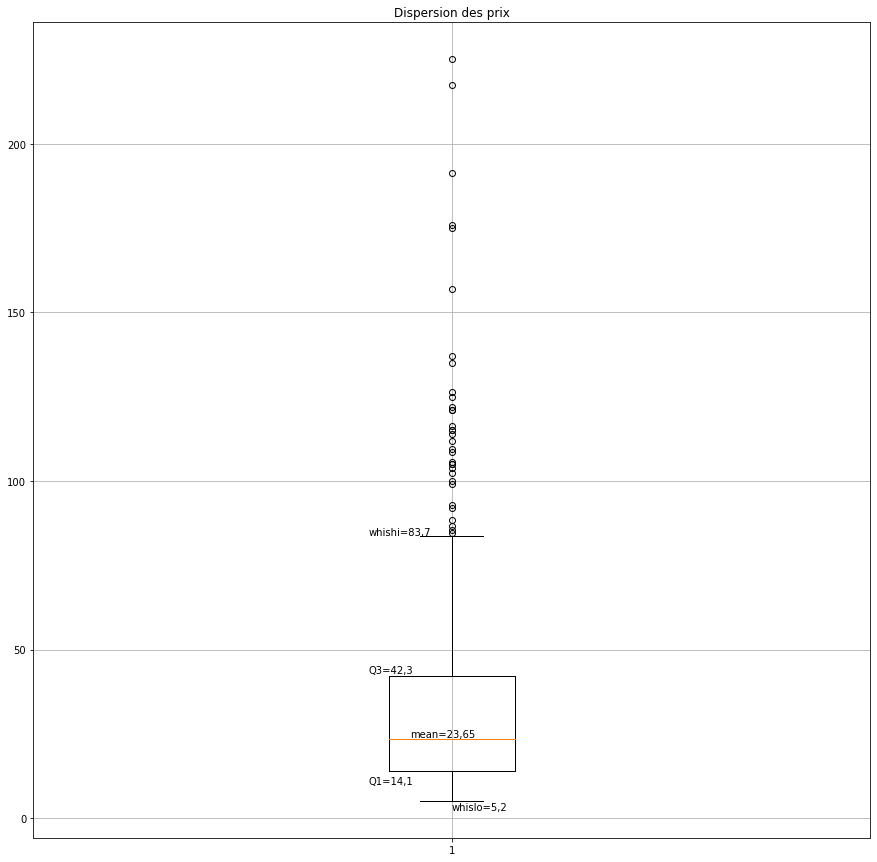

In [67]:
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot()
ax.boxplot(Vente["price"])
ax.set_title("Dispersion des prix")
axQ3= ax.annotate("Q3=42,3",(0.9, 43))
axQ1= ax.annotate("Q1=14,1",(0.9,10))
axMed= ax.annotate("mean=23,65",(0.95,24))
axHi= ax.annotate("whishi=83,7",(0.9,84))
axLo= ax.annotate("whislo=5,2",(1,2.5))
plt.grid(True)
plt.show()

In [68]:
boxplotstats = cbk.boxplot_stats(Vente["price"])
boxplotstats

[{'mean': 32.58114525139665,
  'iqr': 28.200000000000003,
  'cilo': 21.995402935175036,
  'cihi': 25.30459706482496,
  'whishi': 83.7,
  'whislo': 5.2,
  'fliers': array([100. ,  88.4, 225. , 126.5,  85.6, 176. , 108.5, 157. , 104. ,
         109.6, 102.3, 137. , 217.5, 105. , 105. , 112. ,  86.8,  84.7,
          92. , 124.8, 175. , 191.3,  93. , 122. , 114. , 135. , 105.6,
         116.4, 115. , 121. ,  99. , 115. , 121. ]),
  'q1': 14.1,
  'med': 23.65,
  'q3': 42.300000000000004}]

In [69]:
print("Le total de valeurs abherrentes/atypiques est de {}".format(len(boxplotstats[0]['fliers'])))

Le total de valeurs abherrentes/atypiques est de 33


<h2>méthode IQR</h2>

In [70]:
Q1 = Vente["price"].quantile(0.25)
Q3 = Vente["price"].quantile(0.75)
IQR = Q3-Q1
IQR

28.200000000000003

In [71]:
left_whisker = Q1-1.5*IQR
right_whisker = Q3+1.5*IQR
print(left_whisker)
print(right_whisker)

-28.200000000000003
84.60000000000001


In [72]:
outliersIQR = Vente[(Vente["price"]<left_whisker) | (Vente["price"]>right_whisker)]["price"]
print("Le nombre de valeurs abherrentes/atypiques est de {}".format(len(outliersIQR)))

Le nombre de valeurs abherrentes/atypiques est de 33


<h2> Z-Score </h2>

In [73]:
Vente['zscore'] = stats.zscore(Vente["price"])

In [74]:
mean =  Vente["price"].mean()
std = Vente["price"].std()

In [75]:
mean

32.581145251396656

In [76]:
std

27.842942018131374

In [77]:
outliersZscore = []
for price in Vente["price"] :
    if abs((price-mean)/std)>3 :
        outliersZscore.append(price)
print(f"Nombre d'outliers détectés, méthode Zscore = {len(outliersZscore)}")

Nombre d'outliers détectés, méthode Zscore = 14


In [78]:
outliersZscore = []
for price in Vente["price"] :
    if abs((price-mean)/std)>2 :
        outliersZscore.append(price)
print(f"Nombre d'outliers détectés, méthode Zscore = {len(outliersZscore)}")

Nombre d'outliers détectés, méthode Zscore = 30


In [79]:
Vente.sort_values("zscore", axis= 0, ascending=False).head()

,product_id,sku,post_title,price,total_sales,post_excerpt,stock_quantity,chiffres_affaires,pourcentage_CA,zscore
289,4352,15940,Champagne Egly-Ouriet Grand Cru Millésimé 2008,225.0,5.0,Issu d’un assemblage de 70% de Pinot Noir du g...,0,1125.0,1.59,6.915698
523,5001,14581,David Duband Charmes-Chambertin Grand Cru 2014,217.5,0.0,Robe cerise chatoyante. Un nez de fruits rouge...,20,0.0,0.00,6.646141
692,5892,14983,Coteaux Champenois Egly-Ouriet Ambonnay Rouge ...,191.3,3.0,Cet Ambonnay évoque les grands Pinots Noirs de...,10,573.9,0.81,5.704491
308,4402,3510,Cognac Frapin VIP XO,176.0,13.0,La cuvée VIP XO à été enrichie d’eaux-de-vie t...,8,2288.0,3.24,5.154596
657,5767,15185,Camille Giroud Clos de Vougeot 2016,175.0,0.0,<div>Ce vin provient de vignes âgées de 50 ans...,12,0.0,0.00,5.118655


In [80]:
Vente[Vente['zscore']>2].head(10)

,product_id,sku,post_title,price,total_sales,post_excerpt,stock_quantity,chiffres_affaires,pourcentage_CA,zscore
152,4115,15382,Zind-Humbrecht Riesling Grand Cru Rangen De Th...,100.0,0.0,"Le nez est puissant, dominant, riche, sur la f...",11,0.0,0.00,2.423091
154,4132,11668,Zind-Humbrecht Pinot Gris Grand Cru Rangen De ...,88.4,0.0,Le nez dévoile déjà une belle intensité de fru...,5,0.0,0.00,2.006177
289,4352,15940,Champagne Egly-Ouriet Grand Cru Millésimé 2008,225.0,5.0,Issu d’un assemblage de 70% de Pinot Noir du g...,0,1125.0,1.59,6.915698
291,4355,12589,Champagne Egly-Ouriet Grand Cru Blanc de Noirs,126.5,11.0,Le Blanc de Noirs représente le meilleur du sa...,2,1391.5,1.97,3.375524
308,4402,3510,Cognac Frapin VIP XO,176.0,13.0,La cuvée VIP XO à été enrichie d’eaux-de-vie t...,8,2288.0,3.24,5.154596
309,4404,3507,Cognac Frapin Château de Fontpinot XO,108.5,2.0,"Exclusivement vendangé, distillé, vieilli et m...",2,217.0,0.31,2.728588
311,4406,7819,Cognac Frapin Château de Fontpinot 1989 20 Ans...,157.0,0.0,Eau-de-Vie distillée à partir de raisins de Gr...,3,0.0,0.00,4.471720
312,4407,3509,Cognac Frapin Cigar Blend,104.0,1.0,Ce cognac bénéficie d'un vieillissement plus l...,6,104.0,0.15,2.566854
318,4582,12857,Château de Meursault Puligny-Montrachet 1er Cr...,109.6,0.0,Il présente une grande fraîcheur minérale au n...,7,0.0,0.00,2.768123
475,4903,14805,Domaine Des Croix Corton Grand Cru Les Grèves ...,102.3,0.0,Ce vin exhale de beaux arômes de fruits rouges...,20,0.0,0.00,2.505755


<h2> Scatterplot </h2>

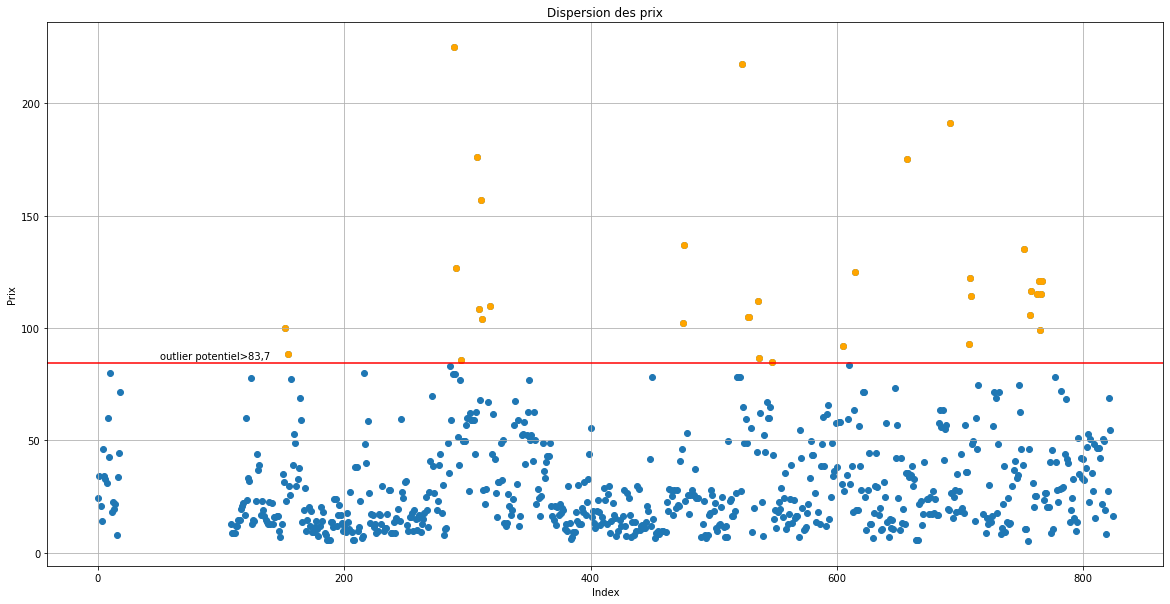

In [81]:
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot()
ax.set_title("Dispersion des prix")
ax.set_ylabel("Prix")
ax.set_xlabel("Index")
plt.scatter(Vente.index, Vente['price'])
plt.scatter(outliersIQR.index, outliersIQR.values,c='orange')
plt.axhline(y=right_whisker, c='red')
axOutlier= ax.annotate("outlier potentiel>83,7",(50,86))
plt.grid(True)
plt.show()

<h2> Liste Outliers </h2>

In [82]:
outliers = Vente[(Vente["price"]<boxplotstats[0]["whislo"]) | (Vente["price"]>boxplotstats[0]["whishi"])]
outliers.sort_values("post_title", axis= 0, ascending=False).head(15)

,product_id,sku,post_title,price,total_sales,post_excerpt,stock_quantity,chiffres_affaires,pourcentage_CA,zscore
152,4115,15382,Zind-Humbrecht Riesling Grand Cru Rangen De Th...,100.0,0.0,"Le nez est puissant, dominant, riche, sur la f...",11,0.0,0.00,2.423091
154,4132,11668,Zind-Humbrecht Pinot Gris Grand Cru Rangen De ...,88.4,0.0,Le nez dévoile déjà une belle intensité de fru...,5,0.0,0.00,2.006177
707,5916,14774,Wemyss Malts Single Cask Scotch Whisky Chocola...,93.0,0.0,"305 bouteilles, 13 ans d'âge.\n\n<span title=""...",3,0.0,0.00,2.171505
708,5917,14775,Wemyss Malts Single Cask Scotch Whisky Choc 'n...,122.0,0.0,"710 bouteilles, 17 ans d'âge.\n\n<span title=""...",4,0.0,0.00,3.213790
709,5918,14773,Wemyss Malts Single Cask Scotch Whisky Chai Ca...,114.0,0.0,644 bouteilles - 16 ans d'âge.\n\nNez très élé...,8,0.0,0.00,2.926263
605,5565,19822,Tempier Bandol Cabassaou 2017,92.0,0.0,"<div id=""wrapper"">\n<div id=""container-wrapper...",0,0.0,0.00,2.135564
547,5070,15347,Pierre Jean Villa Côte Rôtie Fongeant 2017,84.7,0.0,"Fongeant 2017 explose sur un fruit brillant, p...",0,0.0,0.00,1.873196
764,6213,15072,Domaine des Comtes Lafon Volnay 1er Cru Santen...,121.0,0.0,"""Il s'agit là de la meilleure partie de l'appe...",7,0.0,0.00,3.177849
763,6212,13996,Domaine des Comtes Lafon Volnay 1er Cru Santen...,115.0,2.0,"""Il s'agit là de la meilleure partie de l'appe...",2,230.0,0.33,2.962204
528,5007,12791,Domaine des Comtes Lafon Volnay 1er Cru Santen...,105.0,0.0,"""Il s'agit là de la meilleure partie de l'appe...",17,0.0,0.00,2.602795


In [83]:
outliers[outliers['total_sales'] !=0]

,product_id,sku,post_title,price,total_sales,post_excerpt,stock_quantity,chiffres_affaires,pourcentage_CA,zscore
289,4352,15940,Champagne Egly-Ouriet Grand Cru Millésimé 2008,225.0,5.0,Issu d’un assemblage de 70% de Pinot Noir du g...,0,1125.0,1.59,6.915698
291,4355,12589,Champagne Egly-Ouriet Grand Cru Blanc de Noirs,126.5,11.0,Le Blanc de Noirs représente le meilleur du sa...,2,1391.5,1.97,3.375524
295,4359,13853,Champagne Larmandier-Bernier Grand Cru Les Che...,85.6,1.0,Belle maîtrise de ce millésime compliqué en Ch...,0,85.6,0.12,1.905543
308,4402,3510,Cognac Frapin VIP XO,176.0,13.0,La cuvée VIP XO à été enrichie d’eaux-de-vie t...,8,2288.0,3.24,5.154596
309,4404,3507,Cognac Frapin Château de Fontpinot XO,108.5,2.0,"Exclusivement vendangé, distillé, vieilli et m...",2,217.0,0.31,2.728588
312,4407,3509,Cognac Frapin Cigar Blend,104.0,1.0,Ce cognac bénéficie d'un vieillissement plus l...,6,104.0,0.15,2.566854
476,4904,14220,Domaine Des Croix Corton Charlemagne Grand Cru...,137.0,5.0,"Ce Corton Charlemagne éblouit par son assise, ...",13,685.0,0.97,3.752903
692,5892,14983,Coteaux Champenois Egly-Ouriet Ambonnay Rouge ...,191.3,3.0,Cet Ambonnay évoque les grands Pinots Noirs de...,10,573.9,0.81,5.704491
752,6126,14923,Champagne Gosset Célébris Vintage 2007,135.0,2.0,Une robe somptueuse a la teinte jaune pâle eti...,10,270.0,0.38,3.681021
763,6212,13996,Domaine des Comtes Lafon Volnay 1er Cru Santen...,115.0,2.0,"""Il s'agit là de la meilleure partie de l'appe...",2,230.0,0.33,2.962204


In [84]:
print('Le taux de vente des produits presents dans nos outliers est de {}€ avec une vente total de {} produit' .format(outliers['chiffres_affaires'].sum(), outliers.total_sales.sum()))

Le taux de vente des produits presents dans nos outliers est de 6970.0€ avec une vente total de 45.0 produit


In [85]:
print('soit {}% de produits vendus' .format(round((outliers['chiffres_affaires'].sum()/totalChiffres)*100, 3)))

soit 9.877% de produits vendus


In [86]:
alcool = ['Gin ', 'Champagne', 'Cognac', 'Whiskey', 'Whisky', 'Rum', 'Huile', 'Vodka', ' Eau', 'Cidre', 'Bière']
autreAlcool = Vente[Vente['post_title'].str.contains('|'.join(alcool))]
autreAlcool.head()

,product_id,sku,post_title,price,total_sales,post_excerpt,stock_quantity,chiffres_affaires,pourcentage_CA,zscore
158,4141,304,Champagne Gosset Grande Réserve,39.0,40.0,"Le nez, ouvert et expressif, évoque les fruits...",1,1560.0,2.21,0.230699
159,4142,11641,Champagne Gosset Grand Millésime 2006,53.0,30.0,"L'attaque est ample, gourmande avec une belle ...",8,1590.0,2.25,0.733871
160,4144,1662,Champagne Gosset Grand Rosé,49.0,87.0,"Le nez exprime sans détour la fraise, dans sa ...",11,4263.0,6.04,0.590108
161,4146,1360,Champagne Mailly Grand Cru Brut Réserve,29.5,0.0,"Un oeil jaune d’or iridescent, un nez épanoui ...",33,0.0,0.00,-0.110739
162,4147,15648,Champagne Mailly Grand Cru Extra Brut Millésim...,33.0,3.0,L’or riche et profond de sa structure met tout...,7,99.0,0.14,0.015054


In [87]:
ccl1= round(autreAlcool['chiffres_affaires'].sum())
ccl2= round((autreAlcool['chiffres_affaires'].sum()/totalChiffres)*100, 2)
print('Le taux de vente des produits non-vin sont de {}€, comptant pour {}% des ventes' .format(ccl1, ccl2))

Le taux de vente des produits non-vin sont de 20139€, comptant pour 28.54% des ventes


In [88]:
Vendu[Vendu['price'] <=83.7] 

,product_id,sku,post_title,price,total_sales,post_excerpt,stock_quantity,chiffres_affaires,pourcentage_CA
0,3847,15298,Pierre Jean Villa Saint-Joseph Préface 2018,24.20,6.0,"Il exhale un nez subtil, racé avec du poivre f...",0,145.2,0.21
3,4032,19814,Pierre Jean Villa IGP Collines Rhodaniennes Ga...,14.10,3.0,Gamine représente tout le fruité et la gourman...,0,42.3,0.06
7,4042,16042,Pierre Gaillard Cornas 2017,31.20,7.0,Une jolie robe grenat avec des reflets violacé...,34,218.4,0.31
8,4043,14980,Pierre Gaillard Côte Rôtie Esprit de Blonde 2017,60.00,3.0,"Complexité, finesse et subtilité sont au rende...",12,180.0,0.26
9,4045,16041,Pierre Gaillard Côte Rôtie 2018,42.60,14.0,Ce vin exprime la diversité et l'équilibre ent...,66,596.4,0.85
10,4046,15269,Pierre Gaillard Côte Rôtie Rose Pourpre 2017,80.00,6.0,"La cuvée ""Rose Pourpre"" provient d'une parcell...",0,480.0,0.68
12,4048,16044,Pierre Gaillard Saint-Joseph Rouge Clos de Cum...,22.80,7.0,"D'une belle intensité, Clos de Cuminaille a de...",22,159.6,0.23
13,4049,16043,Pierre Gaillard Saint-Joseph Rouge 2018,19.30,1.0,Un Saint-Joseph plein de fruits et de gourmand...,46,19.3,0.03
14,4050,16449,Pierre Gaillard Saint-Joseph Blanc 2019,21.80,6.0,"Ce Saint-Joseph blanc est frais, complexe et t...",0,130.8,0.19
15,4051,16045,Jeanne Gaillard IGP Collines Rhodaniennes Syra...,7.70,6.0,Terre de Mandrin est vinifié par la fille de P...,41,46.2,0.07
